# MVA - Time Series for Machine Learning - Assignment 1

### Théo Di Piazza (theo.dipiazza@gmail.com)

### Stanislas du Ché (stanislasduche@gmail.com)

This notebook only contains the practical part.

# Setup

In [ ]:
#@title installs
!pip install loadmydata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for loadmydata: filename=loadmydata-0.0.9-py3-none-any.whl size=17910 sha256=62dbbfc0ecf7ce6e4dc187feb1ca57d313427c056e785d8b03ddc1cdd718eacc
  Stored in directory: /root/.cache/pip/wheels/b9/8d/92/adbc1c5d09f8492ea5c2dfd6b66f57d267d4ccb618ae3481ed
Successfully built loadmydata


In [ ]:
#@title Import libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from loadmydata.load_human_locomotion import (
    load_human_locomotion_dataset,
    get_code_list,
)

**Utility functions**

In [ ]:
#@title Utility functions
def fig_ax(figsize=(15, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.autoscale(enable=True, axis='x', tight=True)
    return fig, ax

# Spectral feature

## Question 6

In [ ]:
#@title Auto-Covariance function
def get_autocovariance(X,N,T):
  '''
    Compute and return AutoCovariance at time t.
    Inputs:
      X : the signal
      N : number of samples
      t : at time t.
  '''
  T = np.absolute(T)
  return np.sum(X[T:]*X[:N-T])/N

In [ ]:
def mean_std_autocovariance(N, n_sim=100):
    '''
    Compute mean and std of sample autocovariances for N samples and n_sim simulations.
    return values of t, mean, std of the sample autocovariances.
    '''
    T = np.arange(-(N-1),N) # values of tau
    indexes = np.arange(len(T))
    mean = np.zeros(len(T))
    std = np.zeros(len(T))

    for index in indexes: # iterate over indexes
        sample_autocovariances = np.zeros(n_sim)

        for i in range(n_sim): # iterate over number of simulations
            X = np.random.randn(N) # generate noise
            sample_autocovariances[i] = get_autocovariance(X, N, T[index]) # compute autocovariance

        mean[index] = np.mean(sample_autocovariances)
        std[index] = np.std(sample_autocovariances)
    
    return T, mean, std

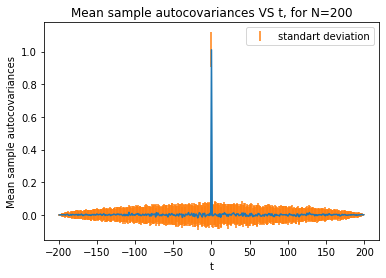

In [ ]:
#@title AutoCovariance for N=200
## generate, compute mean and std of sample autocovariances for N=200
T, mean, std = mean_std_autocovariance(200, 100)


plt.plot(T, mean)
plt.errorbar(T, mean, std, linestyle='None', zorder=-3, label='standart deviation')
plt.xlabel('t'); plt.ylabel('Mean sample autocovariances')
plt.title('Mean sample autocovariances VS t, for N=200')
plt.legend()
plt.savefig('q6_N200_sampleautocov.png', bbox_inches='tight')

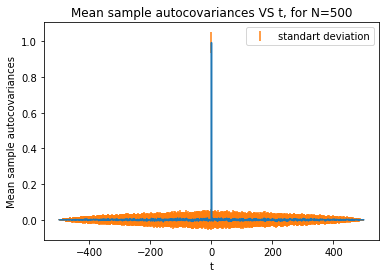

In [ ]:
#@title AutoCovariance for N=500
## generate, compute mean and std of sample autocovariances for N=500
T, mean, std = mean_std_autocovariance(500,100)


plt.plot(T, mean)
plt.errorbar(T, mean, std, linestyle='None', zorder=-3, label='standart deviation')
plt.xlabel('t'); plt.ylabel('Mean sample autocovariances')
plt.title('Mean sample autocovariances VS t, for N=500')
plt.legend()
plt.savefig('q6_N500_sampleautocov.png', bbox_inches='tight')

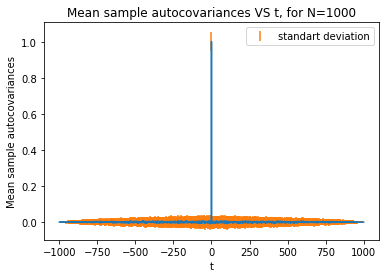

In [ ]:
#@title AutoCovariance for N=1000
## generate, compute mean and std of sample autocovariances for N=1000
T, mean, std = mean_std_autocovariance(1000,100)


plt.plot(T, mean)
plt.errorbar(T, mean, std, linestyle='None', zorder=-3, label='standart deviation')
plt.xlabel('t'); plt.ylabel('Mean sample autocovariances')
plt.title('Mean sample autocovariances VS t, for N=1000')
plt.legend()
plt.savefig('q6_N1000_sampleautocov.png', bbox_inches='tight')

In [ ]:
#@title Periodograms function
def periodograms(N, n_sim=100):
    '''
    Compute mean and std of periodograms for N samples and n_sim simulations.
    return values of k, mean, std of the sample autocovariances.
    '''
    k_values = list(range(math.floor(N/2)+1)) # values of k

    perios = np.zeros((len(k_values), n_sim)) # initialize periodograms
    auto_covs = np.zeros((N,n_sim)) # initialize autocovariance
    cos_func = np.cos(2*np.pi * np.outer(k_values, np.arange(N))/N) # pre-compute cos values
    cos_func[:,1:] = 2*cos_func[:,1:]

    for i in range(n_sim): # iterate over nb of simulations
        X = np.random.randn(N) # generate noise
        auto_covs[:,i] = np.array([get_autocovariance(X, N, t) for t in range(N)])
        perios[:,i] = np.sum(cos_func * auto_covs[:,i], axis=1)

    mean_perios = np.mean(perios, axis=1)
    std_perios = np.std(perios, axis=1)

    return k_values, mean_perios, std_perios

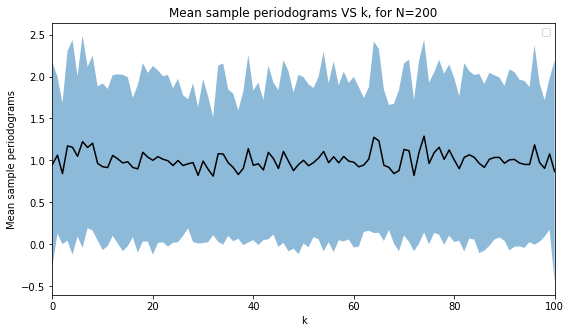

In [ ]:
#@title Periodograms for N=200
# Generate, compute mean and std
N = 200
k_values, mean_sample_periodograms, std_sample_periodograms = periodograms(N,100)

# Plot
fig, ax = fig_ax(figsize=(9, 5))
ax.plot(k_values, mean_sample_periodograms, 'k-')
ax.fill_between(k_values, mean_sample_periodograms-std_sample_periodograms, mean_sample_periodograms+std_sample_periodograms, alpha=0.5)
plt.xlabel('k'); plt.ylabel('Mean sample periodograms')
plt.title(f'Mean sample periodograms VS k, for N={N}')
plt.legend()
plt.savefig(f'q6_N{N}_periodo.png', bbox_inches='tight')

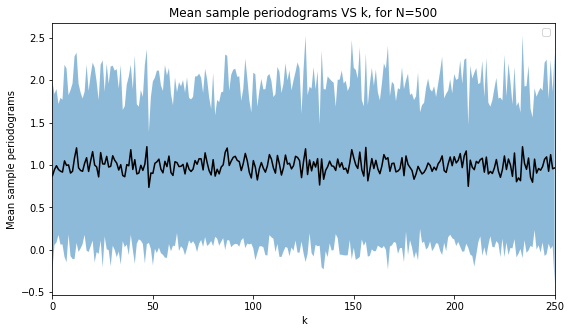

In [ ]:
#@title Periodograms for N=500
# Generate, compute mean and std
N = 500
k_values, mean_sample_periodograms, std_sample_periodograms = periodograms(N,100)

# Plot
fig, ax = fig_ax(figsize=(9, 5))
ax.plot(k_values, mean_sample_periodograms, 'k-')
ax.fill_between(k_values, mean_sample_periodograms-std_sample_periodograms, mean_sample_periodograms+std_sample_periodograms, alpha=0.5)
plt.xlabel('k'); plt.ylabel('Mean sample periodograms')
plt.title(f'Mean sample periodograms VS k, for N={N}')
plt.legend()
plt.savefig(f'q6_N{N}_periodo.png', bbox_inches='tight')

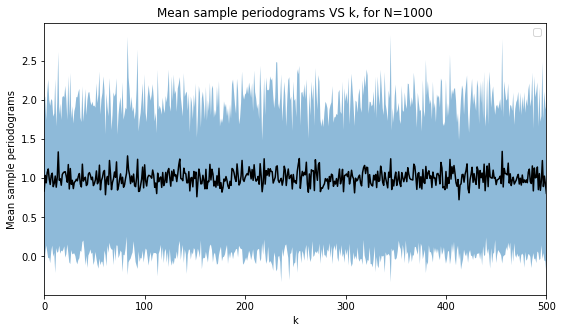

In [ ]:
#@title Periodograms for N=1000
# Generate, compute mean and std
N = 1000
k_values, mean_sample_periodograms, std_sample_periodograms = periodograms(N,100)

# Plot
fig, ax = fig_ax(figsize=(9, 5))
ax.plot(k_values, mean_sample_periodograms, 'k-')
ax.fill_between(k_values, mean_sample_periodograms-std_sample_periodograms, mean_sample_periodograms+std_sample_periodograms, alpha=0.5)
plt.xlabel('k'); plt.ylabel('Mean sample periodograms')
plt.title(f'Mean sample periodograms VS k, for N={N}')
plt.legend()
plt.savefig(f'q6_N{N}_periodo.png', bbox_inches='tight')

## Question 9
Bartlett’s procedure : 

- Step 1 : divide the signal in K sections of equal durations

- Step 2 : compute a periodogram on each section

- Step 3 : Average periodogram

Provided the sections are independent, this has the effect of dividing the variance
by K.

In [ ]:
#@title Bartlett Estimate function
def avg_periodograms(N, K, n_sim):
    '''
      Compute mean and std of Barlett procedure for N samples, K windows and n_sim simulations.
      return values of t, mean, std of the sample autocovariances.
    '''
    ## we devide the signal into K parts and take the average of the periodograms
    n_k = math.floor(N/K) # length of each splited signal
    k_values = list(range(math.floor(n_k/2)+1)) # values of k
    perios = np.zeros((len(k_values),n_sim,K)) # initialize values of bartlett estimation
    auto_covs = np.zeros((n_k,n_sim,K)) 
    cos_func = np.cos(2*np.pi * np.outer(k_values, np.arange(n_k))/n_k) # pre-compte values of cos
    cos_func[:,1:] = 2*cos_func[:,1:]

    for i in range(n_sim): # Iterate over simulations
        X = np.random.randn(N)
        X = np.array_split(X, K)

        for j in range(K): # iterate over each split
            auto_covs[:,i,j] = np.array([get_autocovariance(X[j], n_k, t) for t in range(n_k)])
            perios[:,i,j] = np.sum(cos_func * auto_covs[:,i,j], axis=1)

    mean_perios =np.mean(np.mean(perios, axis=2), axis=1)
    std_perios = np.std(np.mean(perios, axis=2), axis=1)

    return k_values, mean_perios, std_perios

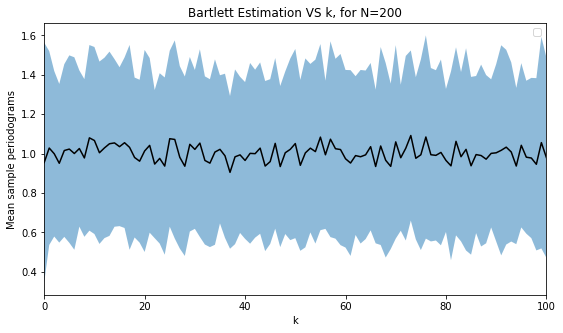

In [ ]:
#@title Bartlett Estimation for N=200
# Generate, compute mean and std
K, n_sim = 5, 100
N = 200*K # Multiply by K to have the same length for the output
k_values, mean_sample_periodograms, std_sample_periodograms = avg_periodograms(N, K, n_sim)

fig, ax = fig_ax(figsize=(9, 5))
ax.plot(k_values, mean_sample_periodograms, 'k-')
ax.fill_between(k_values, mean_sample_periodograms-std_sample_periodograms, mean_sample_periodograms+std_sample_periodograms, alpha=0.5)
plt.xlabel('k'); plt.ylabel('Mean sample periodograms')
plt.title(f'Bartlett Estimation VS k, for N={math.floor(N/K)}')
plt.legend()
plt.savefig(f'q9_N{math.floor(N/K)}_bartlett.png', bbox_inches='tight')

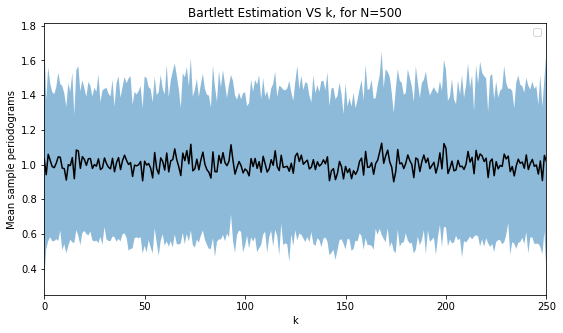

In [ ]:
#@title Bartlett Estimation for N=500
# Generate, compute mean and std
K, n_sim = 5, 100
N = 500*K # Multiply by K to have the same length for the output
k_values, mean_sample_periodograms, std_sample_periodograms = avg_periodograms(N, K, n_sim)

fig, ax = fig_ax(figsize=(9, 5))
ax.plot(k_values, mean_sample_periodograms, 'k-')
ax.fill_between(k_values, mean_sample_periodograms-std_sample_periodograms, mean_sample_periodograms+std_sample_periodograms, alpha=0.5)
plt.xlabel('k'); plt.ylabel('Mean sample periodograms')
plt.title(f'Bartlett Estimation VS k, for N={math.floor(N/K)}')
plt.legend()
plt.savefig(f'q9_N{math.floor(N/K)}_bartlett.png', bbox_inches='tight')

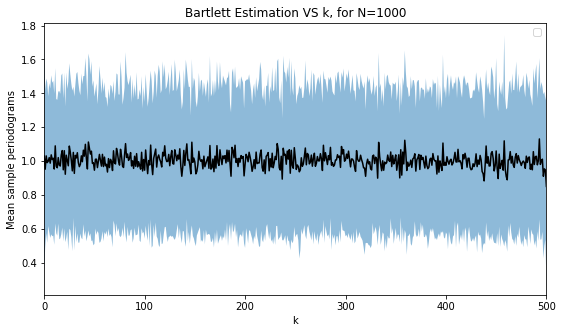

In [ ]:
#@title Bartlett Estimation for N=1000
# Generate, compute mean and std
K, n_sim = 5, 100
N = 1000*K # Multiply by K to have the same length for the output
k_values, mean_sample_periodograms, std_sample_periodograms = avg_periodograms(N, K, n_sim)

fig, ax = fig_ax(figsize=(9, 5))
ax.plot(k_values, mean_sample_periodograms, 'k-')
ax.fill_between(k_values, mean_sample_periodograms-std_sample_periodograms, mean_sample_periodograms+std_sample_periodograms, alpha=0.5)
plt.xlabel('k'); plt.ylabel('Mean sample periodograms')
plt.title(f'Bartlett Estimation VS k, for N={math.floor(N/K)}')
plt.legend()
plt.savefig(f'q9_N{math.floor(N/K)}_bartlett.png', bbox_inches='tight')

# Dynamic time warping (DTW)

## Data

This data set consists of signals collected with inertial measurement units (accelerometer+gyroscope), from 230 subjects undergoing a fixed protocol:
- standing still,
- walking 10 m,
- turning around,
- walking back,
- stopping.

In this assignment, we only consider the vertical acceleration of the left foot and all signals are truncated to 20 seconds (as a result, they all have same length). Signals are sampled at 100 Hz.

The measured population is composed of healthy subjects as well as patients with neurological or orthopedic disorders.

The start and end time stamps of thousands of footsteps are available.

The data are part of a larger data set described in [1].

[1] Truong, C., Barrois-Müller, R., Moreau, T., Provost, C., Vienne-Jumeau, A., Moreau, A., Vidal, P.-P., Vayatis, N., Buffat, S., Yelnik, A., Ricard, D., & Oudre, L. (2019). A data set for the study of human locomotion with inertial measurements units. Image Processing On Line (IPOL), 9.

**The task** is to classify footsteps in healthy/non-healthy.

The following cell defines the training set `(X_train, y_train)` and testing set `(X_test, y_test)`.

In [ ]:
subset_indexes_train = [95, 619, 441, 149, 951, 803, 214, 34, 37, 630]
subset_indexes_test = [683, 259, 59, 387, 634]

code_list = get_code_list()

X_train = list()  # list of footstep signals
y_train = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_train):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_train.append(signal[start:end])
        y_train.append(label)

        
X_test = list()  # list of footstep signals
y_test = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_test):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_test.append(signal[start:end])
        y_test.append(label)

100%|██████████| 202M/202M [00:14<00:00, 14.2MiB/s]


## Question 10

Objective : from the vertical acceleration of the left foot, classify step as healthy or non-healthy.

The DTW will be used : DTW takes into consideration the fact that the two time series being compared may vary in length and speed.

In [ ]:
!pip install dtw-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.4/661.4 KB 17.9 MB/s eta 0:00:00


In [ ]:
import random
from dtw import dtw
from sklearn.metrics import f1_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [ ]:
# Max length of a signal
len_max = max(max(map(len, X_train)), max(map(len, X_test)))

print(f'Maximum length of a signal: {len_max}')

Maximum length of a signal: 147


In [ ]:
# Max amplitude of a signal
len_max = min(min(map(min, X_train)), min(map(min, X_test)))

print(f'Minimum amplitude of a signal: {len_max}')

Minimum amplitude of a signal: -4.650351


In [ ]:
#@title Function make_same_length to have signals with the same length
# To use KNeighborsClassifier properly, lists must be of the same length
def make_same_length(X):
  '''
    Returns lists of same length with -1 filled to complete the list if needed.
  '''
  # Compute length max of the signals
  len_max = 147 # max(map(len, X))
  new_X = []

  # Iteravte over signals
  for i in range(len(X)):
    x = X[i] # current signal
    new_x = list(x[:len_max]) + [-10]*(len_max - len(x)) # adjust length by filling with -10
    new_X.append(new_x) # update current signal

  return new_X

# Function which compute DTW from 2 signals
def custom_DTW(x, y):
  '''
    Compute DTW between x and y and returns the distance.
  '''
  return dtw(x, y, keep_internals=True).distance

In [ ]:
#@title Make signals of same length and shuffle

# Shuffle train set before training
zipped_data = list(zip(X_train, y_train))
random.shuffle(zipped_data)
X_train, y_train = zip(*zipped_data)

# Get lists with updated length
X_train = make_same_length(X_train)
X_test = make_same_length(X_test)

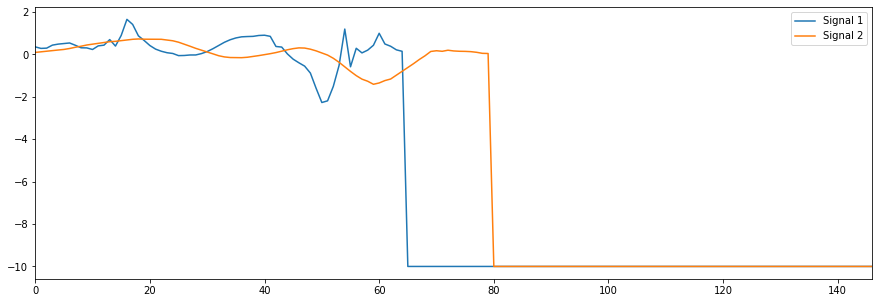

In [ ]:
#@title Display 2 signals to see how resize impacts DTW
signal1, signal2 = X_train[0], X_train[2]
fig, ax = fig_ax()
ax.plot(signal1, label='Signal 1')
ax.plot(signal2, label='Signal 2')
_ = plt.legend()

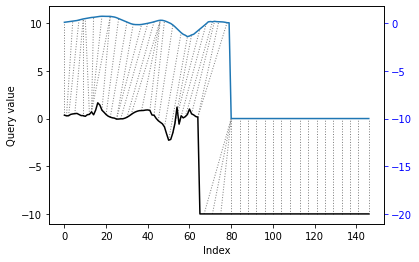

In [ ]:
#@title Display 2 signals to see DTW
alignment = dtw(signal1, signal2, keep_internals=True)
alignment.plot(type="twoway", offset=10)

We notice with satisfaction that the abrupt change of variation makes the DTW finish at the end of both steps. 

In [ ]:
#@ Train the model

# Model and gridsearch
f1_scorer = make_scorer(f1_score, pos_label=1) # 1 is positive label
model = KNeighborsClassifier(metric=custom_DTW)
nb_neighbours = np.arange(3, 6)
parameters = {'n_neighbors': list(nb_neighbours)}
clf = GridSearchCV(model, parameters, cv=5, verbose=3, scoring=f1_scorer)

clf.fit(X_train, y_train) # train

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .....................n_neighbors=3;, score=0.857 total time=  12.3s
[CV 2/5] END .....................n_neighbors=3;, score=0.789 total time=   9.6s
[CV 3/5] END .....................n_neighbors=3;, score=0.848 total time=   9.4s
[CV 4/5] END .....................n_neighbors=3;, score=0.968 total time=   9.3s
[CV 5/5] END .....................n_neighbors=3;, score=0.857 total time=   9.3s
[CV 1/5] END .....................n_neighbors=4;, score=0.857 total time=   9.4s
[CV 2/5] END .....................n_neighbors=4;, score=0.757 total time=   9.5s
[CV 3/5] END .....................n_neighbors=4;, score=0.848 total time=   9.4s
[CV 4/5] END .....................n_neighbors=4;, score=0.897 total time=  10.0s
[CV 5/5] END .....................n_neighbors=4;, score=0.857 total time=   9.4s
[CV 1/5] END .....................n_neighbors=5;, score=0.857 total time=   9.5s
[CV 2/5] END .....................n_neighbors=5;,

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric=<function custom_DTW at 0x7ff738b75a60>),
             param_grid={'n_neighbors': [3, 4, 5]},
             scoring=make_scorer(f1_score, pos_label=1), verbose=3)

In [ ]:
#@title Display best parameters of the grid search
print(f'Best number of neighbors : {clf.best_params_["n_neighbors"]}')

Best number of neighbors : 3


In [ ]:
#@title Evaluation on test set with class 0 and 1
model = clf.best_estimator_
test_predictions = model.predict(X_test)
test_f1_0 = f1_score(y_test, test_predictions, pos_label=0)
test_f1_1 = f1_score(y_test, test_predictions, pos_label=1)

pred_train = model.predict(X_train)
train_f1_0 = f1_score(y_train, pred_train, pos_label=0)
train_f1_1 = f1_score(y_train, pred_train, pos_label=1)

print(f'F1 score label 0 : train set :{train_f1_0:.2f} -  test set :{test_f1_0:.2f}')
print(f'F1 score label 1 : train set :{train_f1_1:.2f} -  test set :{test_f1_1:.2f}')

F1 score label 0 : train set :0.91 -  test set :0.09
F1 score label 1 : train set :0.90 -  test set :0.48


## Question 11

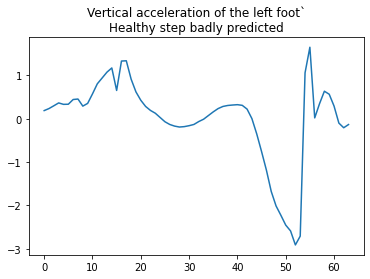

In [ ]:
#@title Display a badly classify for the class HEALTHY 

# Iterate over label
for i in range(len(y_test)):
  
  # If its a class healthy badly predicted
  if(y_test[i]==0 and test_predictions[i]==1):
    # Extract the signal to display
    signal_to_display = X_test[i]
    signal_to_display = [x for x in signal_to_display if x!=-10]
    break

plt.plot(signal_to_display)
plt.title('Vertical acceleration of the left foot`\nHealthy step badly predicted')
plt.savefig(f'q11_badly_healthy.png', bbox_inches='tight')

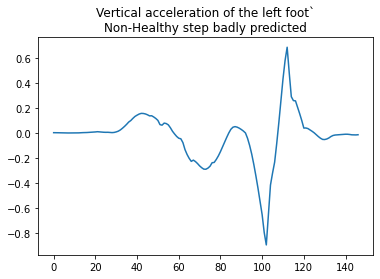

In [ ]:
#@title Display a badly classify for the class NON-HEALTHY 

# Iterate over label
for i in range(len(y_test)):
  
  # If its a class non-healthy badly predicted
  if(y_test[i]==1 and test_predictions[i]==0):
    # Extract the signal to display
    signal_to_display = X_test[i]
    signal_to_display = [x for x in signal_to_display if x!=-10]
    break

plt.plot(signal_to_display)
plt.title('Vertical acceleration of the left foot`\nNon-Healthy step badly predicted')
plt.savefig(f'q11_badly_nonhealthy.png', bbox_inches='tight')

# Save the notebook as HTML

In [ ]:
# Connect to google colab to save the script as HTML as the end of the execution
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Command to save the file as HTML
! jupyter nbconvert --to html /content/drive/MyDrive/ENS_MVA/S2/TS/TPs/HW1/assignment1_shared.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/ENS_MVA/S2/TS/TPs/HW1/assignment1_shared.ipynb to html
[NbConvertApp] Writing 917701 bytes to /content/drive/MyDrive/ENS_MVA/S2/TS/TPs/HW1/assignment1_shared.html
